## **A Machine Learning Approach to Predict Customer Churn for a Telecom Compnay Based on User Data Analysis**

This is a Machine learning approach to predict customer churn for next time Service retention for Telecom Company based user data Analysis.It is under Supervised Machine learning problem which is Regression Based.

Behind the Project:

Arfin Shariar (201-15-3316)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlib
from matplotlib import pyplot as plt

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#mounting our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset Import**

In [ ]:
#Dataset Import
df = pd.read_csv("/content/drive/MyDrive/Final Defense/Data/CHURN.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## **EDA & Feature Importance**

In [ ]:
print(f"Shape of Dataset: {df.shape}")

Shape of Dataset: (7043, 21)


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.count().sum()

147903

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Change Data types of TotalCharges

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum().T

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is no Value Missing in our Dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()
df["Churn"] = L_encoder.fit_transform(df["Churn"])

In [ ]:
#Let's Explore our Churn value
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn')

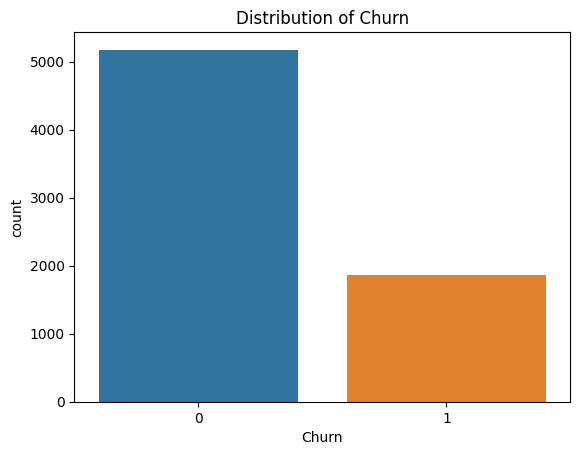

In [ ]:
sns.countplot(x="Churn",data = df)
plt.title("Distribution of Churn")

We clearly seen that our Dataset is in Imbalance Condition. We need to treat our these Imbalance conditions.

Before Treatment we need to find out Catagorical & Numerical Data from our Dataset.

In [ ]:
cat_cols = []

for col in df.columns:
  if df[col].dtype == "object":
    cat_cols.append(col)

print("Our Catagorical Columns are: ",format(len(cat_cols)))
cat_cols

Our Catagorical Columns are:  16


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Now Let's Findout Binary Columns of Dataset

In [ ]:
bin_col = []

for col in df.columns:
  if df[col].value_counts().shape[0] == 2:
    bin_col.append(col)

print("Our Binary Columns are: ",format(len(bin_col)))
bin_col

Our Binary Columns are:  7


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

Let's Check the Distribution of those value using Countplot

<Axes: xlabel='PhoneService', ylabel='count'>

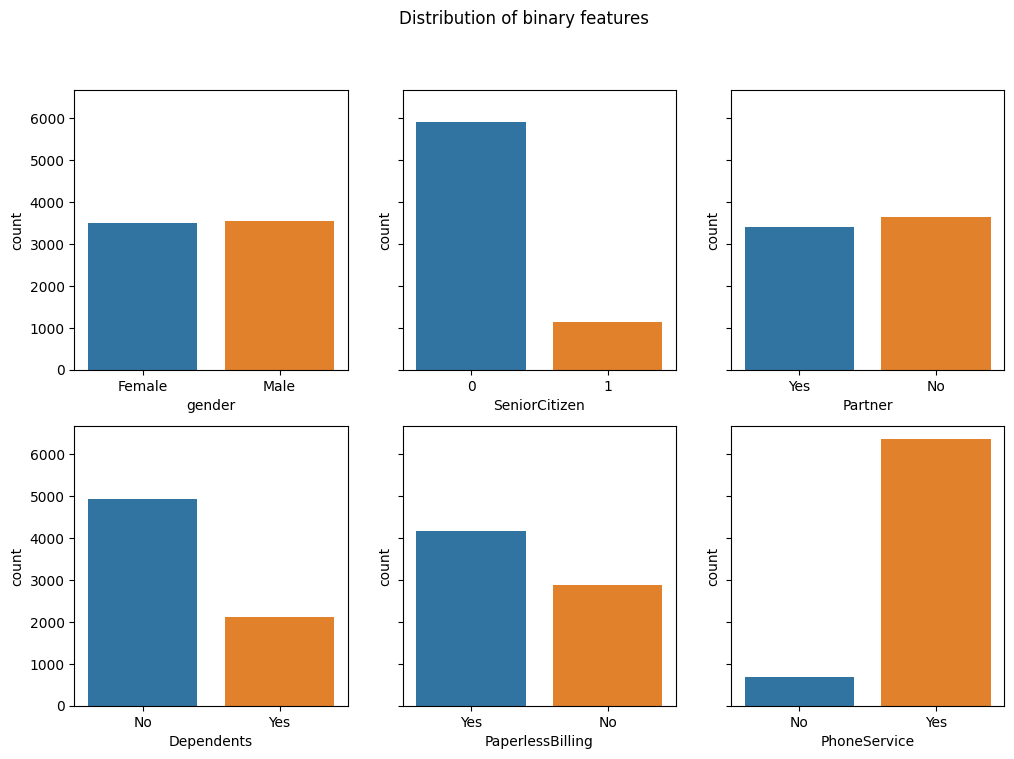

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (12,8), sharey = True)
plt.suptitle("Distribution of binary features")
sns.countplot(x = "gender", data = df, ax=axes[0,0])
sns.countplot(x = "SeniorCitizen", data = df, ax=axes[0,1])
sns.countplot(x = "Partner", data = df, ax=axes[0,2])
sns.countplot(x = "Dependents", data = df, ax=axes[1,0])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[1,1])
sns.countplot(x = "PhoneService", data = df, ax=axes[1,2])

As we can see from the Figure that there is very Significant Imbalance in SeniorCitizen Data, PhoneService Data, Dependents Data.

Affect of These all Variables in Respect to Churn value

In [ ]:
df[['gender', 'Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [ ]:
df[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [ ]:
df[['Partner', 'Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [ ]:
df[['Dependents', 'Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [ ]:
df[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [ ]:
df[['PhoneService', 'Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [ ]:
# Get all non-binary catagorical variables
non_bin_cat_col = [i for i in cat_cols if i not in bin_col ]
non_bin_cat_col

['customerID',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

Now we Inspect our other catagorical value.

<Axes: xlabel='InternetService', ylabel='count'>

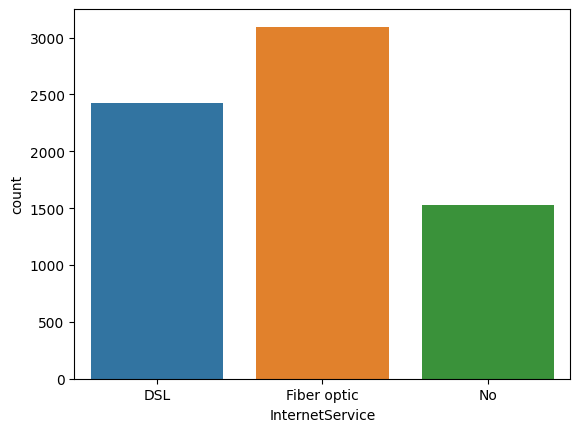

In [ ]:
#For Internet Service
sns.countplot(x = "InternetService", data = df)

In [ ]:
# Impact on churn value
df[['InternetService', 'Churn']].groupby('InternetService').mean().sort_values(by = 'Churn', ascending=False)

,Churn
InternetService,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


Fiber Optics Internet Service has highst Churn Rate.

In [ ]:
df[['MonthlyCharges', 'InternetService']].groupby('InternetService').mean().sort_values(by = 'MonthlyCharges')

,MonthlyCharges
InternetService,
No,21.079194
DSL,58.102169
Fiber optic,91.500129


We Also Seen that Monthly Charge for Fiber Optic connection is higher then other two connection.

<Axes: xlabel='MultipleLines', ylabel='count'>

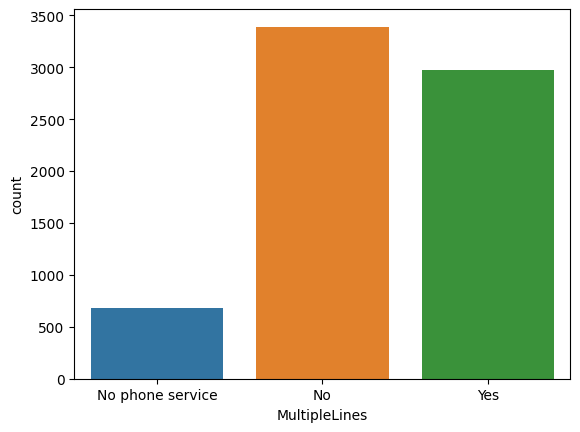

In [ ]:
#For Internet Service
sns.countplot(x = "MultipleLines", data = df)

In [ ]:
# Impact on churn value
df[['MultipleLines', 'Churn']].groupby('MultipleLines').mean().sort_values(by = 'Churn', ascending=False)

,Churn
MultipleLines,
Yes,0.286099
No,0.250442
No phone service,0.249267


We Seen that People with MultipleLines has highst Churn Rate

Now we will see the Internet releated features

<Axes: xlabel='StreamingMovies', ylabel='count'>

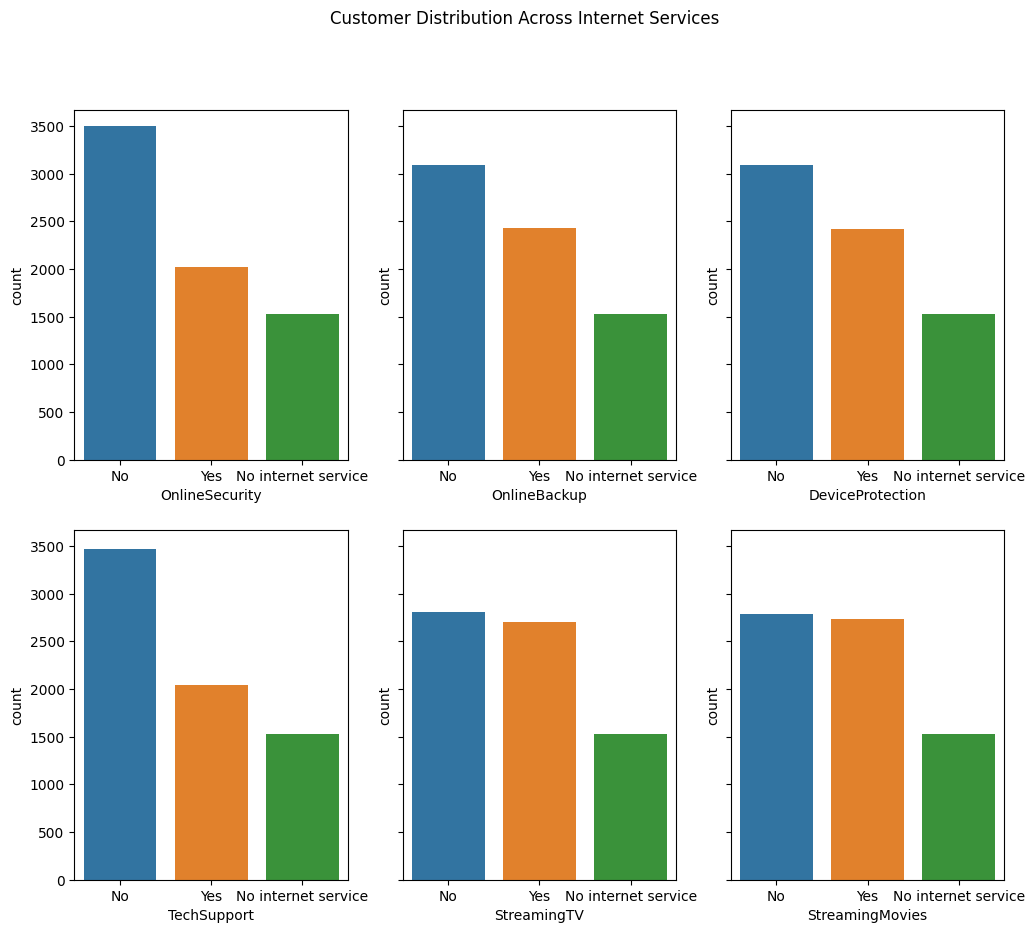

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (12,10), sharey = True)
plt.suptitle('Customer Distribution Across Internet Services')
sns.countplot(x='OnlineSecurity', data = df, ax=axes[0,0], order = df['OnlineSecurity'].value_counts().index)
sns.countplot(x='OnlineBackup', data = df, ax=axes[0,1], order = df['OnlineBackup'].value_counts().index)
sns.countplot(x='DeviceProtection', data = df, ax=axes[0,2], order = df['DeviceProtection'].value_counts().index)
sns.countplot(x='TechSupport', data = df, ax=axes[1,0], order = df['TechSupport'].value_counts().index)
sns.countplot(x='StreamingTV', data = df, ax=axes[1,1], order = df['StreamingTV'].value_counts().index)
sns.countplot(x='StreamingMovies', data = df, ax=axes[1,2], order = df['StreamingMovies'].value_counts().index)

Now we will check it out that, does these all featuers create any impact on our Churn rate

In [ ]:
df[['OnlineSecurity', 'Churn']].groupby('OnlineSecurity').mean().sort_values(by='OnlineSecurity')

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [ ]:
df[['DeviceProtection', 'Churn']].groupby('DeviceProtection').mean().sort_values(by='DeviceProtection')

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [ ]:
df[['OnlineBackup', 'Churn']].groupby('OnlineBackup').mean().sort_values(by='OnlineBackup')

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [ ]:
df[['TechSupport', 'Churn']].groupby('TechSupport').mean().sort_values(by='TechSupport')

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [ ]:
df[['StreamingTV', 'Churn']].groupby('StreamingTV').mean().sort_values(by='StreamingTV')

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [ ]:
df[['StreamingMovies', 'Churn']].groupby('StreamingMovies').mean().sort_values(by='StreamingMovies')

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


So, After Analysis we seen thatthese internet services have a high churn rate

Now We will Analyze Contract & Payment Method

Text(0.5, 1.0, 'Customers by Contract Type')

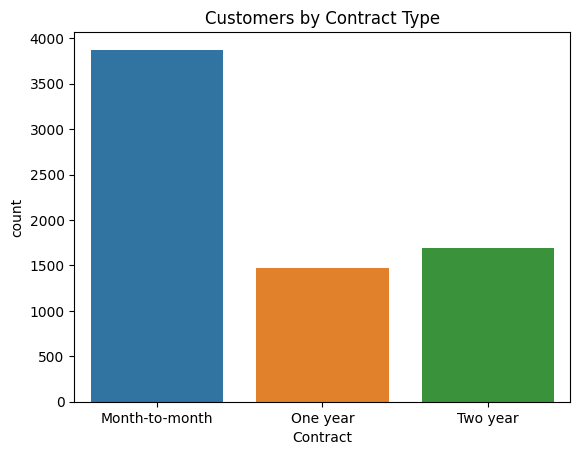

In [ ]:
sns.countplot(x = 'Contract', data = df)
plt.title('Customers by Contract Type')

In [ ]:
df[['Contract', 'Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


Customers with shorter contract have churn rate more

Text(0.5, 1.0, 'Customers Different Types Payment Method')

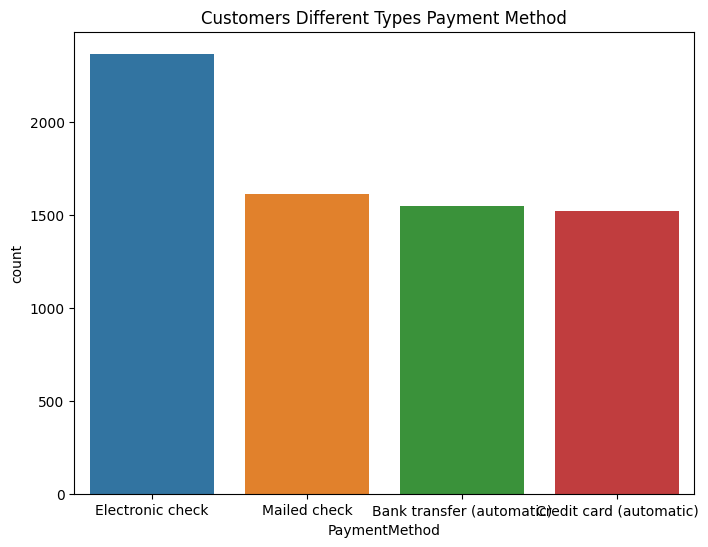

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'PaymentMethod', data = df, order = df['PaymentMethod'].value_counts().index)
plt.title('Customers Different Types Payment Method')

In [ ]:
df[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean().sort_values(by = 'Churn')

,Churn
PaymentMethod,
Credit card (automatic),0.152431
Bank transfer (automatic),0.167098
Mailed check,0.191067
Electronic check,0.452854


customers who pay electronic check are more likely to churn and also this payment method is most common among the costumers.

Let's Check Continues Columns

In [ ]:
num_cols = []

for col in df.columns:
    if df[col].dtype.kind in 'iufc':
        num_cols.append(col)
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Here we will deal with tenure & MonthlyCharges

Text(0.5, 1.0, 'Tenure vs Churn Value')

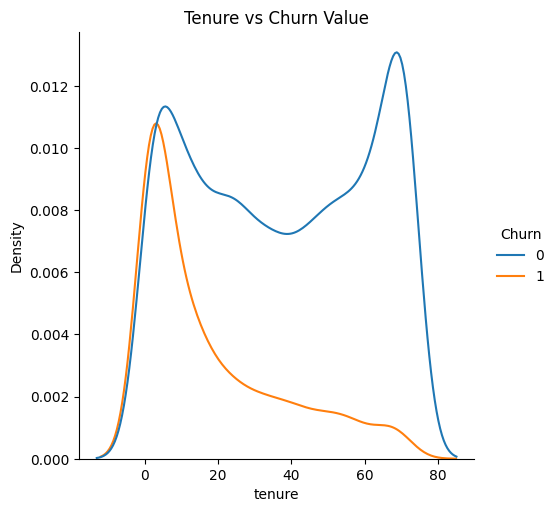

In [ ]:
# Working with Tenure
sns.displot(data = df, x = "tenure", hue = "Churn", kind = "kde")
plt.title('Tenure vs Churn Value')

Customers with lower tenure tend to churn more and vice-versa.

Text(0.5, 1.0, 'Monthly Charges vs Churn Value')

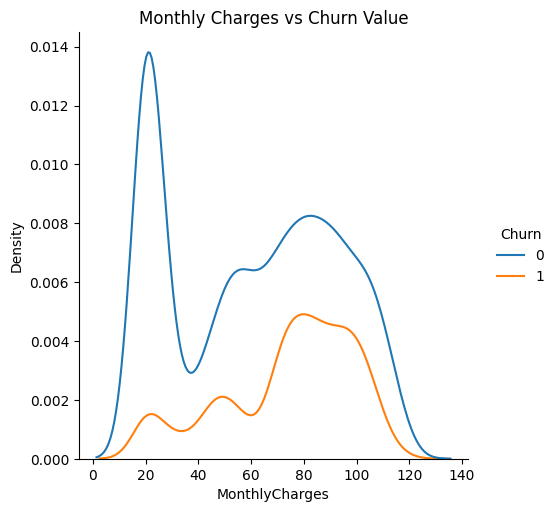

In [ ]:
# wORKING Monthly Charges
sns.displot(data = df, x= 'MonthlyCharges', hue = 'Churn', kind = "kde")
plt.title('Monthly Charges vs Churn Value')

As the monthly charges go up customers tend to churn more.

In [ ]:
df[['MonthlyCharges', 'Churn', 'tenure']].groupby('Churn').mean()

,MonthlyCharges,tenure
Churn,,
0,61.265124,37.569965
1,74.441332,17.979133


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

After EDA we seen that for our Model building and prediction every Feature of Columns are so important for us except customerID. So we will only Drop these Columns from our Dataset. We also need to drop Gender & TotalCharges

In [ ]:
df.drop("customerID", axis=1, inplace = True)
df.drop("gender",axis=1,inplace = True)
df.drop("TotalCharges",axis=1,inplace = True)

In [ ]:
# Extract catagorical features
cat_features = [i for i in df.columns if df[i].dtype == 'object']
cat_features

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## **Data Preprocessing**

OneHotEncoding the Catagorical Features

In [ ]:
encoded_df = pd.get_dummies(df, columns = cat_features, drop_first = True)

Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
temp_1 = scaler.fit_transform(df[["tenure"]])
temp_2 = scaler.fit_transform(df[["MonthlyCharges"]])

In [ ]:
# Replacing the original cols with scaled ones
encoded_df['tenure'] = temp_1
encoded_df['MonthlyCharges'] = temp_2

Treatment of Imbalance Data using UpSampling Techniques

We Already Know that our Churn Value has in Imbalance conditions
Let's Check it again

Text(0.5, 1.0, 'Distribution of Target Before Upsampling')

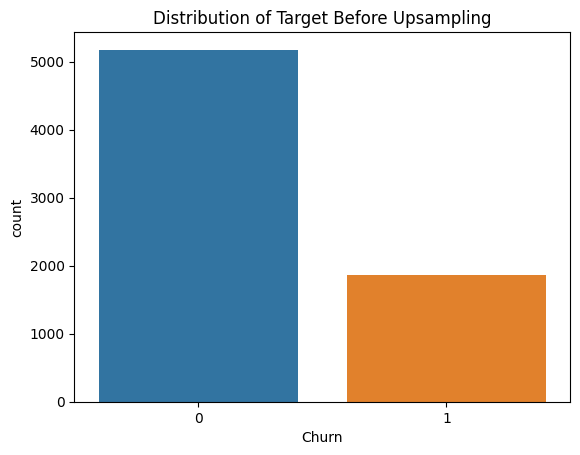

In [ ]:
sns.countplot(x = "Churn", data = df)
plt.title('Distribution of Target Before Upsampling')

In [ ]:
churned = encoded_df[encoded_df['Churn']==1]
not_churned = encoded_df[encoded_df['Churn'] == 0]

In [ ]:
churned_upsampled = resample(churned,
                             replace = True,
                             n_samples = len(not_churned),
                             random_state = 1)

Text(0.5, 1.0, 'Distribution of Target After Upsampling')

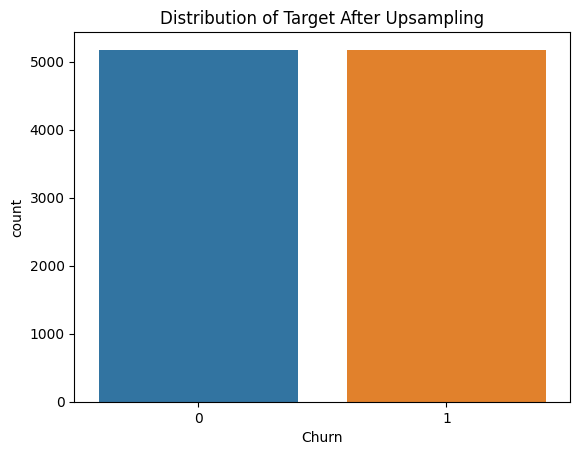

In [ ]:
# Combining the upsampled data
final_df = pd.concat([churned_upsampled, not_churned])
sns.countplot(x = "Churn", data = final_df)
plt.title("Distribution of Target After Upsampling")

In [ ]:
final_df.head(2)

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4025,0,0.055556,0.562687,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
927,0,0.180556,0.625871,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


## **Model Building & Testing**

**Spliting Dataset**

In [ ]:
x = final_df.drop("Churn", axis = 1) #Independet Variable
y = final_df["Churn"] #Dependent Variable / Target Variable

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 1, test_size = 0.2)

**Model Bulding**

For Model Building we will try 4 different Model. They are:

1. ADABoost Classifier
2. XGBoost Classifier
3. RandomForest Classifier
3. DecisionTree Classifier

### **Adaboost**

In [ ]:
ada_class = AdaBoostClassifier()

In [ ]:
ada_class.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
# Accuracy score on training data
ada_train_pred = ada_class.predict(x_train)
ada_acc_train = accuracy_score(ada_train_pred, y_train)
print("Accuracy score on trianing data:",ada_acc_train)

# Accurcy on test data
ada_test_pred = ada_class.predict(x_test)
ada_acc_test = accuracy_score(ada_test_pred, y_test)
print("Accuracy score on test data:",ada_acc_test)

Accuracy score on trianing data: 0.7767576709350085
Accuracy score on test data: 0.7719806763285024


In [ ]:
ada_recall = recall_score(y_test,ada_test_pred)
ada_precision = precision_score(y_test, ada_test_pred)
print("AdaBoost Classifier model's metrics:\n")
print("Accuracy on Training Data:", round(ada_acc_train*100, 2),"%")
print("Accuracy on Test Data:", round(ada_acc_test*100,2),"%")
print("Recall Score:", round(ada_recall,2))
print("Precision Score:", round(ada_precision,2))

AdaBoost Classifier model's metrics:

Accuracy on Training Data: 77.68 %
Accuracy on Test Data: 77.2 %
Recall Score: 0.81
Precision Score: 0.76


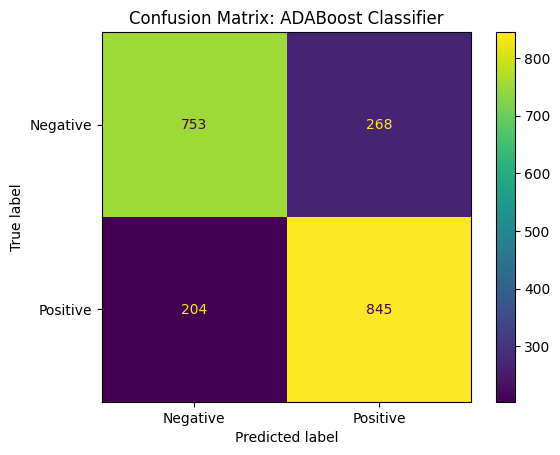

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, ada_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: ADABoost Classifier')
plt.show()

In [ ]:
#ROC and AOC CURVE Visualization for KNN
ada_prob = ada_class.predict_proba(x_test)[:,1]
ada_AOC = metrics.roc_auc_score(y_test,ada_prob)
print("AOC SCORE: ",ada_AOC)

AOC SCORE:  0.843226000416422


XGBooster Classifier (area= 0.843226000416422)


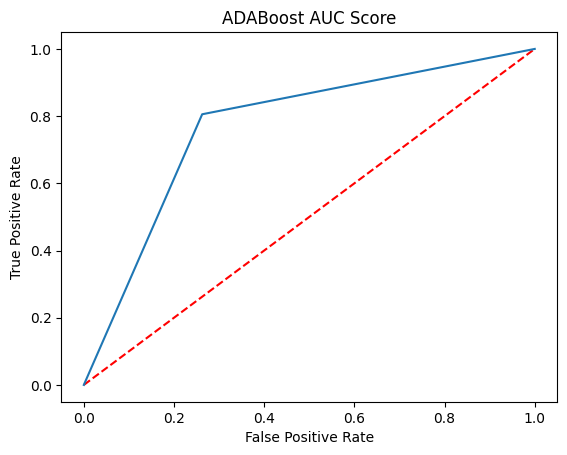

In [ ]:
f_pr,t_pr,thresholdvalues = metrics.roc_curve(y_test,ada_test_pred)
plt.plot([0,1],[0,1],color='red',linestyle='--')
print("XGBooster Classifier (area= " +str(ada_AOC)+")")
plt.plot(f_pr,t_pr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ADABoost AUC Score")
plt.show()

### **XGBoost**

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Accuracy score on training data
xgb_train_pred = xgb_model.predict(x_train)
xgb_acc_train = accuracy_score(xgb_train_pred, y_train)
print("Accuracy score on trianing data:",xgb_acc_train)

# Accuracy score on test data
xgb_test_pred = xgb_model.predict(x_test)
xgb_acc_test = accuracy_score(xgb_test_pred, y_test)
print("Accuracy score on testing data:",xgb_acc_test)

Accuracy score on trianing data: 0.9319884029958927
Accuracy score on testing data: 0.8420289855072464


In [ ]:
xgb_recall = recall_score(y_test,xgb_test_pred)
xgb_precision = precision_score(y_test, xgb_test_pred)
print("XGBClassification model's metrics:\n")
print("Accuracy on Training Data:", round(xgb_acc_train*100, 2),"%")
print("Accuracy on Test Data:", round(xgb_acc_test*100,2),"%")
print("Recall Score:", round(xgb_recall,2))
print("Precision Score:", round(xgb_precision,2))

XGBClassification model's metrics:

Accuracy on Training Data: 93.2 %
Accuracy on Test Data: 84.2 %
Recall Score: 0.9
Precision Score: 0.81


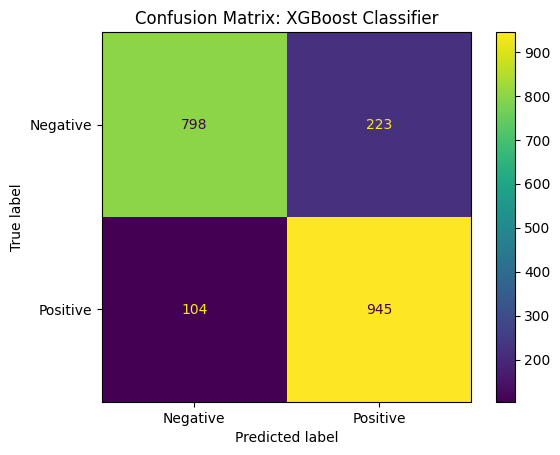

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, xgb_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: XGBoost Classifier')
plt.show()

In [ ]:
#ROC and AOC CURVE Visualization for KNN
xgb_prob = xgb_model.predict_proba(x_test)[:,1]
xgb_AOC = metrics.roc_auc_score(y_test,xgb_prob)
print("AUzC SCORE: ",xgb_AOC)

AOC SCORE:  0.9113231294390721


XGBooster Classifier (area= 0.9113231294390721)


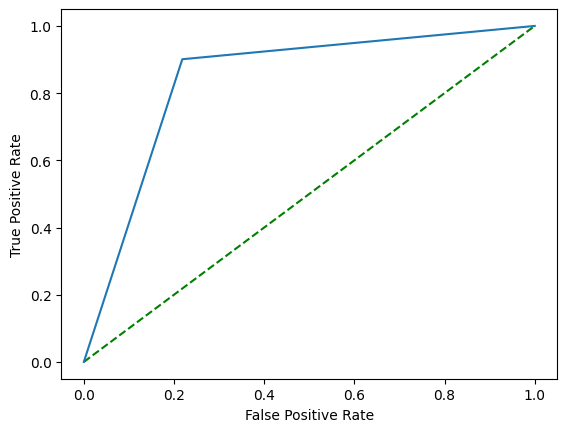

In [ ]:
f_pr,t_pr,thresholdvalues = metrics.roc_curve(y_test,xgb_test_pred)
plt.plot([0,1],[0,1],color='green',linestyle='--')
print("XGBooster Classifier (area= " +str(xgb_AOC)+")")
plt.plot(f_pr,t_pr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### **RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# Accuracy score on training data
rf_train_pred = rf.predict(x_train)
rf_acc_train = accuracy_score(rf_train_pred, y_train)
print("Accuracy score on trianing data:",rf_acc_train)

# Accuracy score on test data
rf_test_pred = rf.predict(x_test)
rf_acc_test = accuracy_score(rf_test_pred, y_test)
print("Accuracy score on testing data:",rf_acc_test)

Accuracy score on trianing data: 0.9971007489731819
Accuracy score on testing data: 0.8966183574879227


In [ ]:
rf_recall = recall_score(y_test,rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred)
print("XGBClassification model's metrics:\n")
print("Accuracy on Training Data:", round(rf_acc_train*100, 2),"%")
print("Accuracy on Test Data:", round(rf_acc_test*100,2),"%")
print("Recall Score:", round(rf_recall,2))
print("Precision Score:", round(rf_precision,2))

XGBClassification model's metrics:

Accuracy on Training Data: 99.71 %
Accuracy on Test Data: 89.66 %
Recall Score: 0.95
Precision Score: 0.86


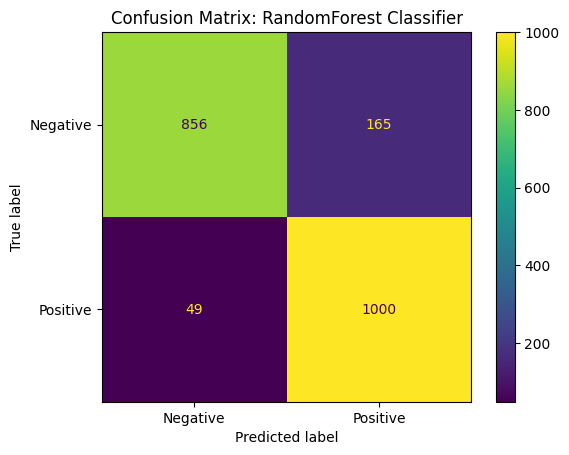

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: RandomForest Classifier')
plt.show()

In [ ]:
#AOC CURVE DecisionTree
rf_prob = rf.predict_proba(x_test)[:,1]
rf_AOC = metrics.roc_auc_score(y_test,rf_test_pred)
print("AUC SCORE: ",rf_AOC)

AUC SCORE:  0.8958412890780735


RandommForest Classifier (area= 0.8958412890780735)


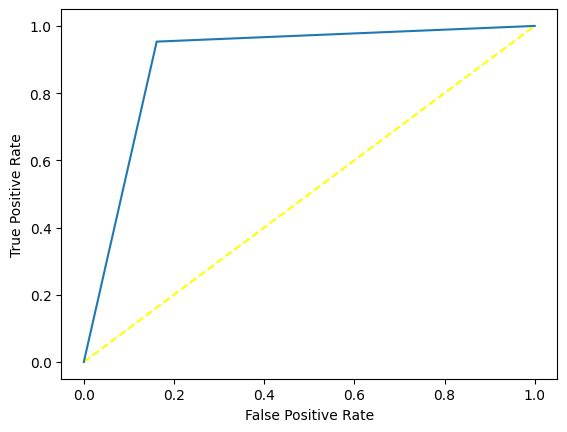

In [ ]:
f_pr,t_pr,thresholdvalues = metrics.roc_curve(y_test,rf_test_pred)
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
print("RandommForest Classifier (area= " +str(rf_AOC)+")")
plt.plot(f_pr,t_pr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Accuracy score on training data
dt_train_pred = dt.predict(x_train)
dt_acc_train = accuracy_score(dt_train_pred, y_train)
print("Accuracy score on trianing data:",dt_acc_train)

# Accuracy score on test data
dt_test_pred = dt.predict(x_test)
dt_acc_test = accuracy_score(dt_test_pred, y_test)
print("Accuracy score on testing data:",dt_acc_test)

Accuracy score on trianing data: 0.9971007489731819
Accuracy score on testing data: 0.8695652173913043


In [ ]:
dt_recall = recall_score(y_test,dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred)
print("XGBClassification model's metrics:\n")
print("Accuracy on Training Data:", round(dt_acc_train*100, 2),"%")
print("Accuracy on Test Data:", round(dt_acc_test*100,2),"%")
print("Recall Score:", round(dt_recall,2))
print("Precision Score:", round(dt_precision,2))

XGBClassification model's metrics:

Accuracy on Training Data: 99.71 %
Accuracy on Test Data: 86.96 %
Recall Score: 0.94
Precision Score: 0.83


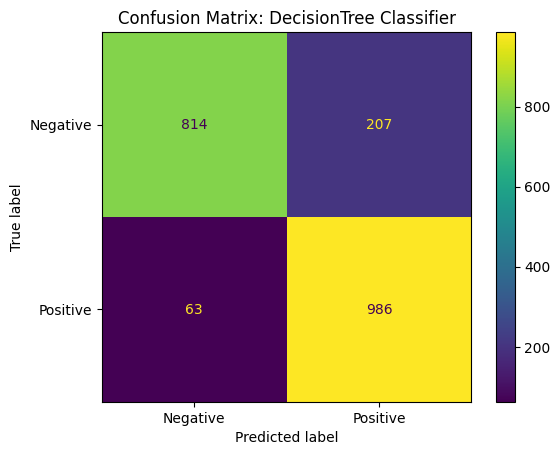

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: DecisionTree Classifier')
plt.show()

In [ ]:
#AUC CURVE DecisionTree
dt_prob = dt.predict_proba(x_test)[:,1]
dt_AUC = metrics.roc_auc_score(y_test,dt_test_pred)
print("AUC SCORE: ",dt_AUC)

AUC SCORE:  0.8686001966333311


DecisionTree Classifier (area= 0.8686001966333311)


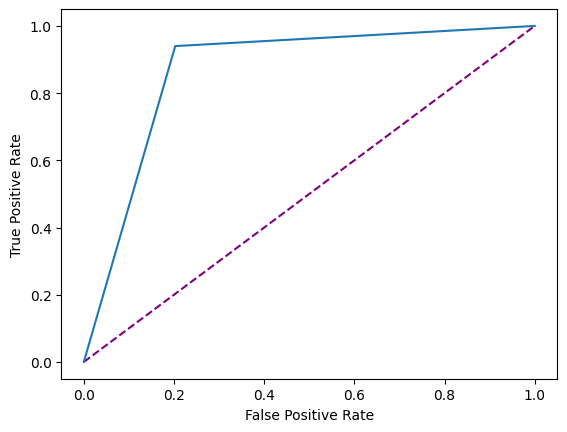

In [ ]:
f_pr,t_pr,thresholdvalues = metrics.roc_curve(y_test,dt_test_pred)
plt.plot([0,1],[0,1],color='purple',linestyle='--')
print("DecisionTree Classifier (area= " +str(dt_AUC)+")")
plt.plot(f_pr,t_pr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Sample data (replace this with your actual model results)
model_results = {
    'Model': ['ADABoost Classifier', 'XGBoost Classifer', 'RandomForest Classifier', 'DecisitionTree Classifier'],
    'Accuracy': [ada_acc_test, xgb_acc_test,rf_acc_test,dt_acc_test],
    'Precision': [ada_precision, xgb_precision, rf_precision, dt_precision],
    'Recall': [ada_recall, xgb_recall, rf_recall, dt_recall],
}

# Creating a DataFrame
results_df = pd.DataFrame(model_results)

# Display the results in a table
print(results_df)

                       Model  Accuracy  Precision    Recall
0        ADABoost Classifier  0.771981   0.759209  0.805529
1          XGBoost Classifer  0.842029   0.809075  0.900858
2    RandomForest Classifier  0.896618   0.858369  0.953289
3  DecisitionTree Classifier  0.869565   0.826488  0.939943


# **Final Result making By Voting Classfier**

In [ ]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('abc', clf1), ('rfc', clf2), ('xgb', clf3),('dt',clf4)], voting='soft')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
voting_accuracy = accuracy_score(y_test, predictions)
voting_recall = recall_score(y_test,predictions)
voting_precision = precision_score(y_test,predictions)
print("Final Accuracy: ", round(voting_accuracy*100,2),"%")
print("Final Recall_score: ", round(voting_recall,2))
print("Final Precision_score: ", round(voting_precision,2))

Final Accuracy:  87.34 %
Final Recall_score:  0.94
Final Precision_score:  0.83


In [ ]:
# Sample data (replace this with your actual model results)
model_results = {
    'Model': ['ADABoost Classifier', 'XGBoost Classifer', 'RandomForest Classifier', 'DecisitionTree Classifier',"Voting Classifier"],
    'Accuracy': [ada_acc_test, xgb_acc_test,rf_acc_test,dt_acc_test,voting_accuracy],
    'Precision': [ada_precision, xgb_precision, rf_precision, dt_precision,voting_precision],
    'Recall': [ada_recall, xgb_recall, rf_recall, dt_recall,voting_recall],
}

# Creating a DataFrame
results_df = pd.DataFrame(model_results)

# Display the results in a table
print(results_df)

                       Model  Accuracy  Precision    Recall
0        ADABoost Classifier  0.771981   0.759209  0.805529
1          XGBoost Classifer  0.842029   0.809075  0.900858
2    RandomForest Classifier  0.896618   0.858369  0.953289
3  DecisitionTree Classifier  0.869565   0.826488  0.939943
4          Voting Classifier  0.873430   0.833192  0.938036


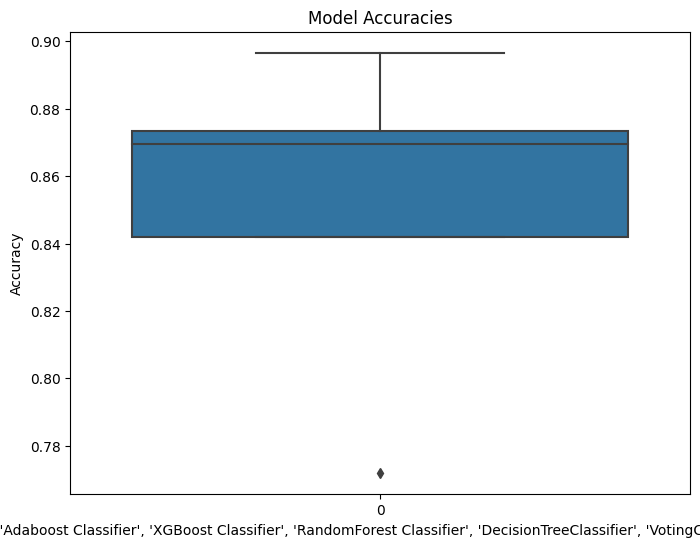

In [ ]:
# Sample model accuracies (replace with your actual accuracy values)
model_accuracies = [ada_acc_test,xgb_acc_test,rf_acc_test,dt_acc_test,voting_accuracy]
model = ["Adaboost Classifier","XGBoost Classifier","RandomForest Classifier","DecisionTreeClassifier","VotingClassifier"]
# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=model_accuracies)
plt.title('Model Accuracies')
plt.ylabel("Accuracy")
plt.xlabel(model)
plt.show()

In [ ]:
# model check using ADABoost
d = {'Actual Status': y_test, 'Predicted Status': ada_test_pred}
pred_data = pd.DataFrame(d)
pred_data

,Actual Status,Predicted Status
2972,0,0
6961,1,1
5098,1,1
2007,1,1
1928,1,0
...,...,...
2802,1,1
6212,0,0
6184,0,0
2717,0,0


In [ ]:
# model check using XGBBoost
d = {'Actual Status': y_test, 'Predicted Status': xgb_test_pred}
pred_data = pd.DataFrame(d)
pred_data

,Actual Status,Predicted Status
2972,0,0
6961,1,1
5098,1,1
2007,1,1
1928,1,1
...,...,...
2802,1,1
6212,0,0
6184,0,0
2717,0,0


In [ ]:
# model check using RandomForest
d = {'Actual Status': y_test, 'Predicted Status': rf_test_pred}
pred_data = pd.DataFrame(d)
pred_data

,Actual Status,Predicted Status
2972,0,0
6961,1,1
5098,1,1
2007,1,1
1928,1,1
...,...,...
2802,1,1
6212,0,0
6184,0,0
2717,0,0


In [ ]:
# model check using DecisionTree
d = {'Actual Status': y_test, 'Predicted Status': dt_test_pred}
pred_data = pd.DataFrame(d)
pred_data

,Actual Status,Predicted Status
2972,0,0
6961,1,1
5098,1,1
2007,1,1
1928,1,1
...,...,...
2802,1,1
6212,0,0
6184,0,0
2717,0,0


So, We can See that, Our 3 Models are now well trained & tested to Predict Customer Churn with high accuracy rate except ADABoost Classifier.